# Freeswitch Audio Recordings Traffic Analysis 

## Altanai Bisht 
( abisht@seattleu.import os 
os.environ['JAVA_HOME']="C:\\Users\\abisht\\.jdks\\corretto-11.0.15"
print(os.environ['JAVA_HOME'])m)

License GPL 3

In [ ]:
import os 
os.environ['JAVA_HOME']="C:\\Users\\abisht\\.jdks\\corretto-11.0.15"
print(os.environ['JAVA_HOME'])

C:\Users\abisht\.jdks\corretto-11.0.15


In [ ]:
import findspark
findspark.init()
findspark.find()

'C:\\Users\\abisht\\Downloads\\spark-3.2.1-bin-hadoop3.2\\spark-3.2.1-bin-hadoop3.2'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [39]:
import pyspark 
from pyspark.sql import SparkSession
from pyspark.mllib.stat import Statistics 
spark = SparkSession.builder.getOrCreate()

# Call Recorded Audio File 

- wav

In [140]:
import scipy
import os.path, time, datetime
import platform

In [141]:
audiopath= 'C:\\Users\\abisht\\VoIPCallLogs_BigDataSet\\audiofiles'

In [142]:
rdd =  os.listdir(audiopath)
rdd

['M1F1-Alaw-AFsp.wav',
 'M1F1-AlawWE-AFsp.wav',
 'M1F1-float32-AFsp.wav',
 'M1F1-float64WE-AFsp.wav',
 'M1F1-mulawWE-AFsp.wav',
 'M1F1-uint8-AFsp.wav',
 'output.wav',
 'recording08_44_12.wav',
 'recording08_44_18.wav',
 'recording08_46_25.wav',
 'recording08_47_08.wav',
 'recording08_47_11.wav',
 'recording08_59_58.wav',
 'recording09_00_00.wav']

In [143]:
base_df = []
for file in os.listdir(audiopath):
    # base_df.append(datetime.datetime.fromtimestamp(os.stat(os.path.join(audiopath,file)).st_mtime).timestamp())
    base_df.append(datetime.datetime.fromtimestamp(os.stat(os.path.join(audiopath,file)).st_mtime))
base_df

[datetime.datetime(2022, 5, 31, 18, 28, 40, 715168),
 datetime.datetime(2022, 5, 31, 18, 28, 45, 266090),
 datetime.datetime(2022, 5, 31, 18, 33, 6, 522561),
 datetime.datetime(2022, 5, 31, 18, 33, 2, 669869),
 datetime.datetime(2022, 5, 31, 18, 28, 49, 364154),
 datetime.datetime(2022, 5, 31, 18, 28, 53, 829964),
 datetime.datetime(2022, 5, 31, 8, 42, 14, 791170),
 datetime.datetime(2022, 5, 31, 8, 44, 13, 870020),
 datetime.datetime(2022, 5, 31, 8, 44, 19, 818596),
 datetime.datetime(2022, 5, 31, 8, 46, 27, 27214),
 datetime.datetime(2022, 5, 31, 8, 47, 10, 246106),
 datetime.datetime(2022, 5, 31, 8, 47, 12, 717525),
 datetime.datetime(2022, 5, 31, 8, 59, 59, 821328),
 datetime.datetime(2022, 5, 31, 9, 0, 1, 652869)]

In [144]:
# from pyspark import SparkFiles
# # base_df = spark.read.text(SparkFiles.get(audiopath))
# # base_df = SparkFiles.get(audiopath)
# base_df["start"] =  (datetime.datetime.fromtimestamp(os.stat(audiopath).st_mtime)
# base_df

In [145]:
# sample_logs = [item['value'] for item in base_df.take(15)]
# sample_logs

In [146]:
# # creation_date(audiopath)
# # print("Created: %s" % creation_date(audiopath))
# rtime = os.stat(audiopath).st_mtime
# print(rtime)
# print("Date created:",datetime.datetime.fromtimestamp(rtime))

In [147]:
# from pyspark.sql.functions import regexp_extract

# logs_df = base_df.select(datetime.datetime.fromtimestamp(os.stat(base_df).st_mtime).alias('timestamp'))
# logs_df.show(10, truncate=True)
# print((logs_df.count(), len(logs_df.columns)))

## Data Wrangling

In [148]:
# logs_df= pd.DataFrame(base_df)

In [149]:
# print((base_df.count(), len(base_df.columns)))

In [150]:
from pyspark.sql.functions import col
from pyspark.sql.types import TimestampType

logs_df = spark.createDataFrame(base_df,TimestampType())
logs_df = logs_df.select(col("value").alias("timestamp"))
logs_df.show()

+--------------------+
|           timestamp|
+--------------------+
|2022-05-31 18:28:...|
|2022-05-31 18:28:...|
|2022-05-31 18:33:...|
|2022-05-31 18:33:...|
|2022-05-31 18:28:...|
|2022-05-31 18:28:...|
|2022-05-31 08:42:...|
|2022-05-31 08:44:...|
|2022-05-31 08:44:...|
|2022-05-31 08:46:...|
|2022-05-31 08:47:...|
|2022-05-31 08:47:...|
|2022-05-31 08:59:...|
|2022-05-31 09:00:...|
+--------------------+



## Finding missing values, Drop or values outside of date range 

In [151]:
dates = ("2019-01-01",  "2022-12-31")
# bad_rows_df = logs_df['timestamp'].between(*dates).show(truncate=False)
useful_logs_df= logs_df.select(logs_df['timestamp'], logs_df['timestamp'].between(*dates))
useful_logs_df.count()

14

In [152]:
logs_df = useful_logs_df[useful_logs_df[1]=='true']
logs_df.show(10, truncate=True)

+--------------------+---------------------------------------------------------+
|           timestamp|((timestamp >= 2019-01-01) AND (timestamp <= 2022-12-31))|
+--------------------+---------------------------------------------------------+
|2022-05-31 18:28:...|                                                     true|
|2022-05-31 18:28:...|                                                     true|
|2022-05-31 18:33:...|                                                     true|
|2022-05-31 18:33:...|                                                     true|
|2022-05-31 18:28:...|                                                     true|
|2022-05-31 18:28:...|                                                     true|
|2022-05-31 08:42:...|                                                     true|
|2022-05-31 08:44:...|                                                     true|
|2022-05-31 08:44:...|                                                     true|
|2022-05-31 08:46:...|      

## RDD row to spark dataframe

In [153]:
from pyspark.sql import Row

new_rdd = logs_df.rdd
parsed_rdd = new_rdd.map(lambda r : Row(\
                                        startTime =r[0],\
                                        endTime=r[0],\
                                        calluuid=r[0]))
df2 = spark.createDataFrame(parsed_rdd)
df2.printSchema()

root
 |-- startTime: timestamp (nullable = true)
 |-- endTime: timestamp (nullable = true)
 |-- calluuid: timestamp (nullable = true)



In [154]:
df2.show(1, vertical=True)

-RECORD 0-------------------------
 startTime | 2022-05-31 18:28:... 
 endTime   | 2022-05-31 18:28:... 
 calluuid  | 2022-05-31 18:28:... 
only showing top 1 row



### Daily - Request reponse network traffic 

In [155]:
from pyspark.sql import functions as F

# find the day of the month
daily_traffic_df = df2.select(df2['startTime'], F.dayofmonth('startTime').alias('day'))
daily_traffic_df.show(5, truncate=False)

+--------------------------+---+
|startTime                 |day|
+--------------------------+---+
|2022-05-31 18:28:40.715168|31 |
|2022-05-31 18:28:45.26609 |31 |
|2022-05-31 18:33:06.522561|31 |
|2022-05-31 18:33:02.669869|31 |
|2022-05-31 18:28:49.364154|31 |
+--------------------------+---+
only showing top 5 rows



In [156]:
# Count of calls per day
def_mr = pd.get_option('max_rows')
pd.set_option('max_rows', 10)

daily_df = (daily_traffic_df
                     .groupBy('day')
                     .count()
                     .sort("day"))

daily_df = daily_df.toPandas()
daily_df

,day,count
0,31,14


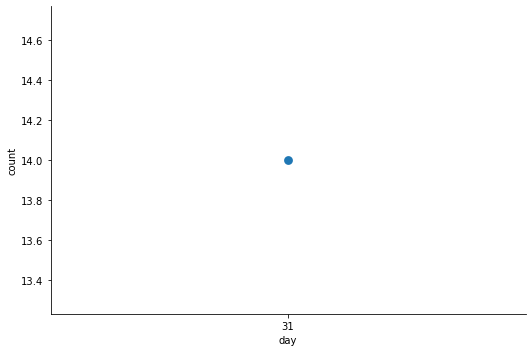

In [157]:
c = sns.catplot(x='day', y='count',
                data=daily_df,
                kind='point', height=5,
                aspect=1.5)

### Hourly - Request reponse network traffic 

In [158]:
# Count of calls per hour

from pyspark.sql.functions import col, count, date_format, date_sub, date_trunc, month, next_day, to_timestamp, weekofyear, window, year

def_mr = pd.get_option('max_rows')
pd.set_option('max_rows', 10)

hourly_df = (daily_traffic_df
                     .select(F.date_format('startTime','yyyy-MM-dd hh:mm:ss').alias('timestamp'))
                     .groupBy(window('timestamp', "15 minutes"))
                     .count())
# hourly_df= hourly_df.groupBy('startTime', window('startTime', "5 minutes")).sum("metric")

hourly_df = hourly_df.toPandas()
hourly_df

,window,count
0,"(2022-05-31 06:15:00, 2022-05-31 06:30:00)",4
1,"(2022-05-31 06:30:00, 2022-05-31 06:45:00)",2
2,"(2022-05-31 08:30:00, 2022-05-31 08:45:00)",3
3,"(2022-05-31 08:45:00, 2022-05-31 09:00:00)",4
4,"(2022-05-31 09:00:00, 2022-05-31 09:15:00)",1


In [159]:
window_start = hourly_df['window'].map(lambda r : Row(start =r[0]))
window_start= spark.createDataFrame(window_start).toPandas()
hourly_df["start"]=window_start
hourly_df.drop(columns=["window"], inplace=True)
hourly_df

,count,start
0,4,2022-05-31 06:15:00
1,2,2022-05-31 06:30:00
2,3,2022-05-31 08:30:00
3,4,2022-05-31 08:45:00
4,1,2022-05-31 09:00:00


<Figure size 432x360 with 0 Axes>

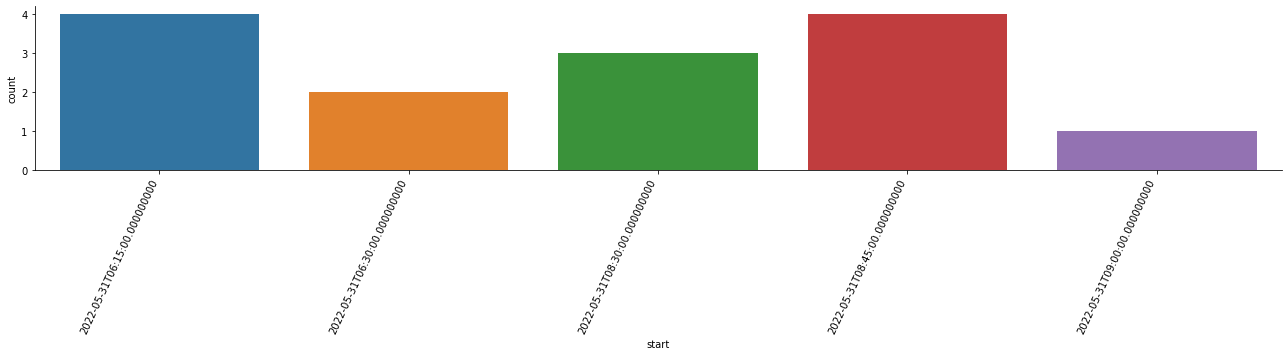

In [161]:
plt.figure(figsize=(6,5))
chart = sns.catplot(x='start', y='count',
                data=hourly_df,
                kind='bar', height=3, aspect=6)
chart.set_xticklabels(rotation=65, horizontalalignment='right')

Ref 
- http://www-mmsp.ece.mcgill.ca/Documents/AudioFormats/WAVE/Samples.html
-https://towardsdatascience.com/40-open-source-audio-datasets-for-ml-59dc39d48f06